In [1]:
from download_helper import DownloadMTBLS2639
file_names = DownloadMTBLS2639([3])
import m2aia as m2

import matplotlib.pyplot as plt

def show_images_in_row(image_list, titles=None, cmap='gray'):
    # Calculate the number of images and create a single-row figure
    num_images = len(image_list)
    fig, ax = plt.subplots(1, num_images, figsize=(15, 5))

    # Loop through the images and titles (if provided) to display them
    for i in range(num_images):
        ax[i].imshow(image_list[i], cmap=cmap)
        ax[i].axis('off')  # Turn off axis labels
        if titles:
            ax[i].set_title(titles[i])
    return fig

I = m2.ImzMLReader(file_names[0])

# load training labels created with M2aia
import SimpleITK as sitk
import numpy as np
label_image = sitk.ReadImage("data/labels2.nrrd")
labels_array = sitk.GetArrayFromImage(label_image) # convert itk image to numpy array
labels_array2 = labels_array.copy()
label_map={0:None, 1:0, 2:None, 3:1, 4:2, 5:3, 6:4}
def map_values(value):
    return label_map.get(value, None)

labels_array = np.vectorize(map_values)(labels_array) # remap labels


[Thu Nov  9 15:10:25 2023 
31.152] [imzML]: data/150505_ew_section3_pos.imzML
	[pixel size (mm)]: 0.025000x0.025000x0.010000
	[image dimension]: 224x169x1
	[num spectra]: 28278
	[spec. type]: ContinuousProfile
	[mass range]: 99.792458 to 1285.640137 with #29693 measurements


(0, 39, (130, 140, 0), 2) 2
(0, 42, (135, 135, 0), 2) 2
(0, 82, (180, 18, 0), 2) 2
(0, 86, (102, 75, 0), 0) 0
102 75
(0, 101, (153, 42, 0), 1) 1


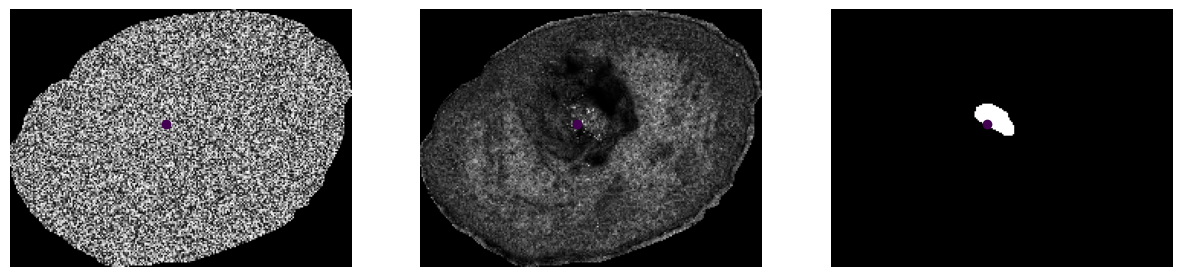

In [2]:
import importlib
importlib.reload(m2)
import matplotlib.pyplot as plt

import numpy as np
data = m2.SpectrumDataset([I], [labels_array], shuffle=False, shape=(39,39))

batch_size = 5
train_loader = m2.BatchGenerator(data, batch_size, shuffle=False)


res = train_loader[0]
fig = show_images_in_row([I.GetIndexArray()[0], I.GetArray(I.GetXAxis()[5000], 200)[0], labels_array[0]==0])

ii = []
for i in range(5):
    _,_,(x,y,z),l = data.elements[i]
    print(data.elements[i], res[1][i])
    if l == 0:
        ii.append(data[i])
        print(x,y)
        
        for ax in fig.axes:
            ax.scatter(x,y,c=l*10)

            





(5, 29693, 39, 39)


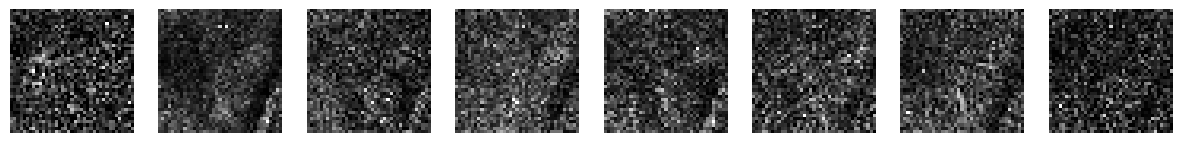

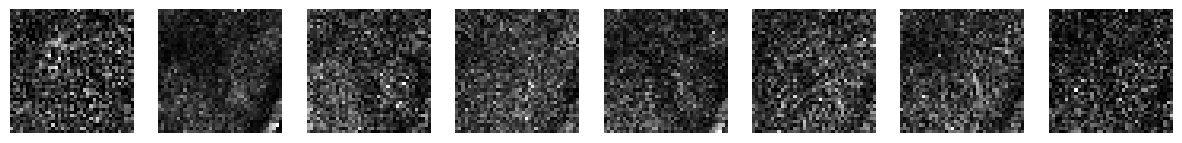

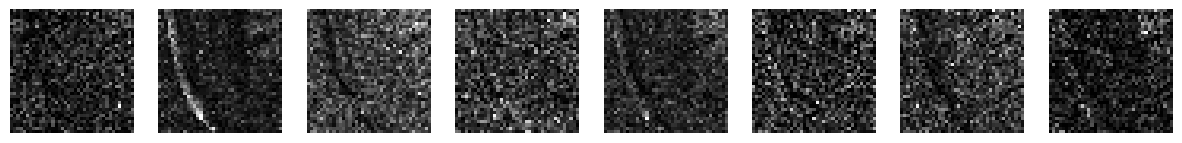

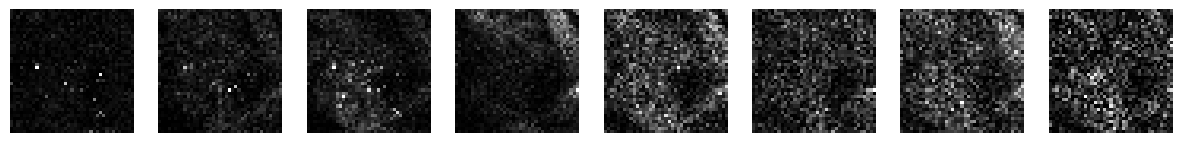

In [3]:

show_images_in_row([res[0][0,i] for i in range(500,29600,4000)])
show_images_in_row([res[0][1,i] for i in range(500,29600,4000)])
show_images_in_row([res[0][2,i] for i in range(500,29600,4000)])
show_images_in_row([res[0][3,i] for i in range(500,29600,4000)])
print(res[0].shape)